# Project 2

Prediction of Customer Churning
(Classification Problem)
# Algorithm used:
- Logistic Algorithm
- Decision Tree Algorithm
- Random Forest Algorithm

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load DataSet

In [2]:
d=pd.read_csv('telecom_churn.csv')

In [3]:
d.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Information about Data

In [4]:
d.shape

(3333, 21)

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
d.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
d.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

# Analyzing the data

In [8]:
d.corr()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


Churn variable is good correlated with total day minute column, total day charge, customer service call, total eve charge and total eve minute. These are best 5 variable

<AxesSubplot:>

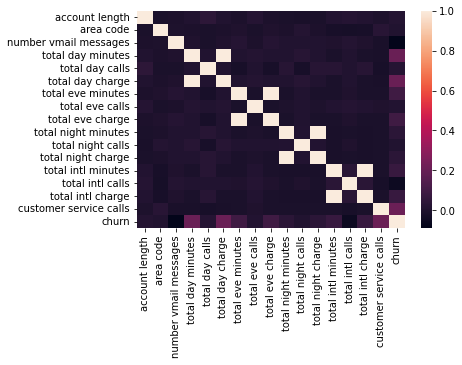

In [9]:
sns.heatmap(d.corr())

<AxesSubplot:xlabel='churn', ylabel='count'>

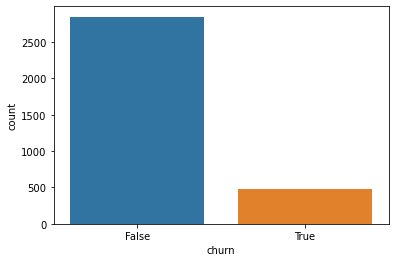

In [10]:
sns.countplot(x='churn',data=d)

Four varables are categrical out of 21 where 2 variables are irrelvent i.e phone no. and state and 
2 vaiables are categorical which we will transform into numerical.

# Removing the irrelevent column(Phone no. and State)

In [11]:
d.drop(d.columns[[0,3]],axis=1,inplace=True)

In [12]:
d.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [13]:
d.shape

(3333, 19)

# Transformation of Categorical Variable(International plan,Churn and voice mail plan) into numerical variable

In [14]:
def churn(s):
    return 1 if s == True else 0
def voice_mail_plan(s):
    return 1 if s == 'yes' else 0
def international_plan(s):
    return 1 if s == 'yes' else 0

In [15]:
d['churn'] = d['churn'].apply(churn)
d['voice mail plan'] = d['voice mail plan'].apply(voice_mail_plan)
d['international plan'] = d['international plan'].apply(international_plan)

In [16]:
d.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [17]:
d.shape

(3333, 19)

In [18]:
d.columns

Index(['account length', 'area code', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype='object')

# Data Exploration

In [19]:
d['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [20]:
483/3333 * 100 # Percentage of customer Churned

14.491449144914492

Now our columns are 19 but originally columns were 21 so to make our model acccurate we will add dummy varibale

# Adding Dummy Variable

In [21]:
d_dummy = pd.get_dummies(d, columns= ['area code'])
d_dummy.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,area code_408,area code_415,area code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,91,11.01,10.0,3,2.70,1,0,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,103,11.45,13.7,3,3.70,1,0,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,0,0,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,89,8.86,6.6,7,1.78,2,0,1,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,121,8.41,10.1,3,2.73,3,0,0,1,0


# Feature Selection

In [22]:
x=d[['account length', 'area code', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls']]
y=d['churn']

# Splitting the Data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=101)

# Data Modelling

# 1.Logistic Regression Algorithm

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr=LogisticRegression()

In [27]:
#Training the data
lr.fit(x_train, y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
predict=lr.predict(x_test)
predict.shape

(667,)

# Evaluation

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted Yes','Predicted No'],index=['Actual Yes','Actual No'])

,Predicted Yes,Predicted No
Actual Yes,578,7
Actual No,77,5


According to Logistic Regression Algorithm Prediction of customer churn is 655 i.e 19% customer will churn.

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       655
           1       0.06      0.42      0.11        12

    accuracy                           0.87       667
   macro avg       0.52      0.65      0.52       667
weighted avg       0.97      0.87      0.92       667



Accuracy with Logistic Regression Algorithm is 87%

# 2.Decision Tree Algorithm

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
tree = DecisionTreeClassifier()

In [35]:
#training the data
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [36]:
pred = tree.predict(x_test)

In [37]:
#Accuracy
score=tree.score(x_test,y_test)
score

0.9250374812593704

# Evaluation

In [38]:
pd.DataFrame(confusion_matrix(y_test,pred),columns=['Predicted Yes','Predicted No'],index=['Actual Yes','Actual No'])

,Predicted Yes,Predicted No
Actual Yes,554,31
Actual No,19,63


According to Decision Tree Algorithm Prediction of customer churn is 572 i.e 17% customer will churn.

In [39]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       573
           1       0.77      0.67      0.72        94

    accuracy                           0.93       667
   macro avg       0.86      0.82      0.84       667
weighted avg       0.92      0.93      0.92       667



Accuracy with Decision Tree Algorithm is 92%

# 3. Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier()

In [41]:
#training the data
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [42]:
pred = rfc.predict(x_test)

# Evaluation

In [43]:
pd.DataFrame(confusion_matrix(y_test,pred),columns=['Predicted Yes','Predicted No'],index=['Actual Yes','Actual No'])

,Predicted Yes,Predicted No
Actual Yes,578,7
Actual No,23,59


According to Logistic Regression Algorithm Prediction of customer churn is 603 i.e 18% customer will churn.

In [44]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       601
           1       0.72      0.89      0.80        66

    accuracy                           0.96       667
   macro avg       0.85      0.93      0.89       667
weighted avg       0.96      0.96      0.96       667



Accuracy with Random Forest Algorithm is 96%

- Random Forest algorithm performs better than Logistic and Decision tree algorithm